In [1]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import Scale
import matplotlib.pyplot as plt

#### Function 1: color balance, to perform this function, the user needs to enter the necessary parameters to perform color balance. 
#### (can use the slider to represent it visually) 

In [6]:
def update_image(value):
    # Get the current values of the sliders
    r = red_scale.get()
    g = green_scale.get()
    b = blue_scale.get()

    # Perform color balance
    image_balanced = cv2.merge((
        np.clip(r * image[:, :, 0], 0, 255).astype(np.uint8),
        np.clip(g * image[:, :, 1], 0, 255).astype(np.uint8),
        np.clip(b * image[:, :, 2], 0, 255).astype(np.uint8),
    ))

    # Update the displayed image
    cv2.imshow("Image", image_balanced)

# Load an example image
image = cv2.imread("Img.jpg")

# Create the GUI window
root = tk.Tk()
root.title("Color Balance")

# Add the sliders to adjust red, green, and blue channels
red_scale = Scale(root, from_=0.0, to=2.0, resolution=0.01, orient=tk.HORIZONTAL, label="Blue", command=update_image)
red_scale.set(1.0)
red_scale.pack()

green_scale = Scale(root, from_=0.0, to=2.0, resolution=0.01, orient=tk.HORIZONTAL, label="Green", command=update_image)
green_scale.set(1.0)
green_scale.pack()

blue_scale = Scale(root, from_=0.0, to=2.0, resolution=0.01, orient=tk.HORIZONTAL, label="Red", command=update_image)
blue_scale.set(1.0)
blue_scale.pack()

# Show the initial image
cv2.imshow("Image", image)

# Start the GUI event loop
root.mainloop()
cv2.destroyAllWindows()

#### Function 2: Show histogram and enter the necessary information to perform histogram equalization. 

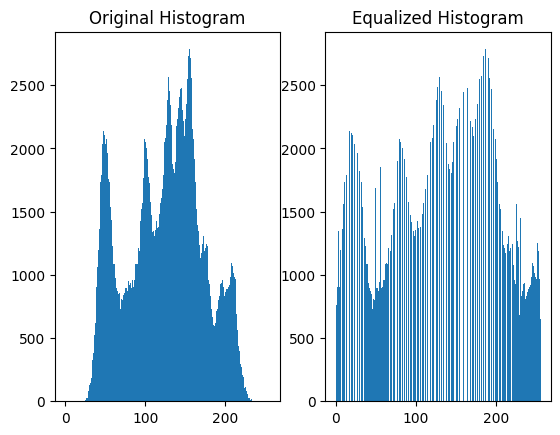

In [2]:
img = cv2.imread('img.jpg', 0)

# Perform histogram equalization
eq_img = cv2.equalizeHist(img)

# Plot the original and equalized histograms
plt.subplot(121)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Original Histogram')

plt.subplot(122)
plt.hist(eq_img.ravel(), 256, [0, 256])
plt.title('Equalized Histogram')

plt.show()


#### Function 3: implement the median filter to remove noise in the image(salt and pepper noise) 

In [ ]:
# Load an example image with salt and pepper noise
image = cv2.imread("noiseimg.jpg", cv2.IMREAD_GRAYSCALE)

# Perform median filtering
median = cv2.medianBlur(image, 3)

# Plot the original and filtered images
plt.subplot(121), plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.title("Noisy Image")
plt.subplot(122), plt.imshow(median, cmap="gray", vmin=0, vmax=255)
plt.title("Filtered Image")

# Show the plot
plt.show()


#### Function 4: implement the Mean filter to remove noise in image (salt and pepper noise) 

In [ ]:
# Load an example image with salt and pepper noise
image = cv2.imread("noiseimg.jpg", cv2.IMREAD_GRAYSCALE)

# Perform mean filtering
mean = cv2.blur(image, (3, 3))

# Plot the original and filtered images
plt.subplot(121), plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.title("Noisy Image")
plt.subplot(122), plt.imshow(mean, cmap="gray", vmin=0, vmax=255)
plt.title("Filtered Image")

# Show the plot
plt.show()


#### Function 5: implement Gaussian smoothing to perform image smoothing. 

In [3]:
def gaussian_smoothing(image, kernel_size, sigma):
    # Create a 2D Gaussian filter
    kernel = cv2.getGaussianKernel(kernel_size, sigma)
    kernel = kernel * kernel.T
    
    # Apply the filter to the image
    smoothed_image = cv2.filter2D(image, -1, kernel)
    
    return smoothed_image

# Load an image
image = cv2.imread("noiseimg.jpg", 0)

# Apply Gaussian smoothing to the image
kernel_size = 3
sigma = 0.5
smoothed_image = gaussian_smoothing(image, kernel_size, sigma)

# Display the original and smoothed images
cv2.imshow("Original", image)
cv2.imshow("Smoothed", smoothed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
